In [1]:
import numpy as np
import pandas as pd
import operator
import csv
from math import log

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

In [3]:
"""
函数说明:计算给定数据集的信息熵
更多说明：计算最后一列（是or否）的香农熵，以这个属性的香农熵来划分，我们的目的就是让这个香农熵越来越小
​
Parameters:
    dataset - 数据集
Returns:
    Ent - 信息熵
"""
def calcShannonEnt(dataset):#香农
    numEntires = len(dataset)                        #返回数据集的行数即样本例数
    labelCounts = {}                                #保存每个标签(Label)出现次数的字典
    for featVec in dataset:                            #对每组特征向量进行统计
        currentLabel = featVec[-1]                    #提取标签(Label)信息
        if currentLabel not in labelCounts.keys():    #如果标签(Label)没有放入统计次数的字典,添加进去
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1                #标签(Label)计数
    Ent = 0.0                                #信息熵
    for key in labelCounts:                            #计算信息熵
        prob = float(labelCounts[key]) / numEntires    #选择该标签(Label)的概率
        Ent -= prob * log(prob, 2)            #利用公式计算
    return Ent                                #返回信息熵

print(calcShannonEnt(dataSet))


0.9975025463691153


In [4]:
"""
函数说明:按照给定特征划分数据集
​
Parameters:
    dataSet - 待划分的数据集
    axis - 划分数据集的特征
    value - 需要返回的特征的值
Returns:
    无
"""
def splitDataSet(dataSet, axis, value):       
    retDataSet = []                                        #创建返回的数据集列表
    for featVec in dataSet:                             #遍历数据集
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]                #去掉axis特征
            reducedFeatVec.extend(featVec[axis+1:])     #将符合条件的添加到返回的数据集
            retDataSet.append(reducedFeatVec)
    return retDataSet                                      #返回划分后的数据集

In [5]:
"""
函数说明:选择最优特征
​
Parameters:
    dataSet - 数据集
Returns:
    bestFeature - 信息增益最大的(最优)特征的索引值
"""
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1                    #特征数量
    baseEntropy = calcShannonEnt(dataSet)                 #计算数据集的信息熵
    bestInfoGain = 0.0                                  #最大信息增益
    bestFeature = -1                                    #最优特征的索引值
    for i in range(numFeatures):                         #遍历所有特征
        #获取dataSet的第i个所有特征
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)                         #创建set集合{},元素不可重复
        newEntropy = 0.0                                  #经验条件熵
        for value in uniqueVals:                         #计算信息增益
            subDataSet = splitDataSet(dataSet, i, value)         #subDataSet划分后的子集
            prob = len(subDataSet) / float(len(dataSet))           #计算子集的概率
            newEntropy += prob * calcShannonEnt(subDataSet)     #根据公式计算经验条件熵
        infoGain = baseEntropy - newEntropy                     #信息增益
        # print("第%d个特征的增益为%.3f" % (i, infoGain))            #打印每个特征的信息增益
        if (infoGain > bestInfoGain):                             #计算信息增益
            bestInfoGain = infoGain                             #更新信息增益，找到最大的信息增益
            bestFeature = i                                     #记录信息增益最大的特征的索引值
    return bestFeature                                             #返回信息增益最大的特征的索引值

In [6]:
"""
函数说明:统计classList中出现此处最多的类标签
​
Parameters:
    classList - 类标签列表
Returns:
    sortedClassCount[0][0] - 出现此处最多的类标签
"""
def majorityCnt(classList):
    classCount = {}
    for vote in classList:                                        #统计classList中每个类标签出现的次数
        if vote not in classCount.keys():
            classCount[vote] = 0   
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)        #根据字典的值降序排序
    return sortedClassCount[0][0]                                #返回classList中出现次数最多的类标签

In [70]:
"""
函数说明:存储各个特征的属性分类值（如果不存，在示例中就不会出现“浅白”）
​
Parameters:
    dataset - 训练数据集
    labels - 分类属性标签
Returns:
    feature - 各个特征的属性分类值
"""
def feature(dataset,labels):
    feature={}
    for i in range(0,len(labels)):
        feature[labels[i]]=list(set([a[i] for a in data]))
    # print(feature)
    return feature
#feature = feature(data,labels)为了方便应在读入数据后先调用feature函数，再进行创建决策树，因为创建决策树函数中用到了feature

#📍注意 这里有个bug，在main下面会报错“'dict' object is not callable”，重新跑一下这个feature函数即可

In [8]:
"""
函数说明:创建决策树
​
Parameters:
    dataSet - 训练数据集
    labels - 分类属性标签
    feature - 各个特征的属性分类值
Returns:
    myTree - 决策树
"""
def createtree(dataset,labels,feature):
    classlist = [example[-1] for example in dataset]            #取分类标签(好瓜or坏瓜)
    if classlist.count(classlist[0])==len(classlist):           #样本全属同一类别，则标记为叶结点
        return classlist[0]
    if labels==[] or len(set([n for a in dataset for n in a[:-1] ]))==len(dataset[0])-1:   #属性集为空（属性遍历结束）or样本在所有属性上取值相同，则标记叶结点
        return majorityCnt(classlist)
    bestFeat = chooseBestFeatureToSplit(dataset)                #选择最优特征
    bestFeatLabel = labels[bestFeat]                            #最优特征的标签
    myTree = {bestFeatLabel:{}}                                    #根据最优特征的标签生成树
    for value in feature[bestFeatLabel]:                                    #遍历特征，创建决策树。
        if [a[bestFeat] for a in dataset].count(value)==0:          #如果集合为空，叶结点类别标记为父结点中样本数最多的
            myTree[bestFeatLabel][value] = majorityCnt(classlist)
        else:                                                      #递归，以该结点生成决策树
            label=labels[:bestFeat]+labels[bestFeat+1:]
            myTree[bestFeatLabel][value] = createtree(splitDataSet(dataset, bestFeat, value), label,feature) #字典赋值
    return myTree

In [9]:
#字典赋值的理解

dictt = {'all':{'a': {1:'no',2:'yes'}, 'b': 2, 'b': '3'}}
dictt['all']['a']='dsew'
print(dictt)

{'all': {'a': 'dsew', 'b': '3'}}


In [10]:
"""
函数说明:判断两list相等元素个数
​
Parameters:
    a - 数组
    b - 数组
Returns:
    res - 数组a,b相等的元素个数
"""
def equalnums(a,b):
    res=0
    for i in range(len(a)):
        if a[i]==b[i]:
            res+=1
    return res

In [11]:
"""
函数说明:预剪枝创建决策树
​
Parameters:
    traindataset - 训练集
    testdataset - 测试集
    labels - 分类属性标签
    feature - 各个特征的属性分类值
Returns:
    myTree - 决策树
"""
def prepruningtree(traindataset,testdataset,labels,feature):
    bestFeat = chooseBestFeatureToSplit(traindataset)                #选择最优特征
    bestFeatLabel = labels[bestFeat]                            #最优特征的标签
    prun=[example[-1] for example in testdataset].count(majorityCnt([example[-1] for example in traindataset]))/len(testdataset) #剪枝后正确率
    result=list(range(len(testdataset)))                       #初始化决策树的预测结果
    for value in feature[bestFeatLabel]:                        #标记测试集
        for i in range(len(testdataset)):
            if [example[bestFeat] for example in testdataset][i]==value:
                result[i]=majorityCnt([example[-1] for example in splitDataSet(traindataset,bestFeat,value)])
    noprun=equalnums(result,[example[-1] for example in testdataset])/len(testdataset)  #不剪枝的正确率
    if prun>noprun:                      #若剪枝后正确率上升，选择剪枝
        return majorityCnt([example[-1] for example in traindataset])
    else:                               #若剪枝后正确率无上升，选择不剪枝
        myTree = {bestFeatLabel:{}}                                    #根据子结点，递归决策树，与创建决策树函数基本一致
        classlist = [example[-1] for example in traindataset]
        if classlist.count(classlist[0])==len(classlist):
            return classlist[0]
        if labels==[] or len(set([n for a in traindataset for n in a[:-1] ]))==len(traindataset[0])-1:
            return majorityCnt(classlist)
        for value in feature[bestFeatLabel]:                                    
            if [a[bestFeat] for a in traindataset].count(value)==0:
                myTree[bestFeatLabel][value] = majorityCnt(classlist)
            else:
                label=labels[:bestFeat]+labels[bestFeat+1:]
                myTree[bestFeatLabel][value] = prepruningtree(splitDataSet(traindataset, bestFeat, value),testdataset,label,feature)
        return myTree

In [12]:
"""
函数说明:后剪枝创建决策树
​
Parameters:
    tree - 剪枝前训练好的树（用训练集）
    traindataset - 训练集
    testdataset - 测试集
    labels - 分类属性标签
    feature - 各个特征的属性分类值
Returns:
    tree - 后剪枝的决策树
"""
def postpruning(tree,traindataset,testdataset,labels,feature):
    firststr=next(iter(tree))
    seconddict=tree[firststr]
    subflag=0
    for key in seconddict.keys():
        if type(seconddict[key])==dict:
            tree[firststr][key]=postpruning(seconddict[key],splitDataSet(traindataset,labels.index(firststr),key),splitDataSet(testdataset,labels.index(firststr),key),labels[:labels.index(firststr)]+labels[labels.index(firststr)+1:],feature)
        else:
            subflag+=1
    if subflag==len(seconddict.keys()):
        prun=[example[-1] for example in testdataset].count(majorityCnt([example[-1] for example in traindataset]))/len(testdataset)
        #print("剪枝后特定类的正确率为d%",prun)
        result=list(range(len(testdataset)))
        for value in seconddict.keys():
            for i in range(len(testdataset)):
                if [example[labels.index(firststr)] for example in testdataset][i]==value:
                    result[i]=majorityCnt([example[-1] for example in splitDataSet(traindataset,labels.index(firststr),value)])
        noprun=equalnums(result,[example[-1] for example in testdataset])/len(testdataset)
        #print("剪枝前特定类的正确率为d%",prun)
        if noprun<=prun:
            return majorityCnt([example[-1] for example in traindataset])
    return tree

In [13]:
#绘制决策树
"""
函数说明:获取决策树叶子结点的数目

Parameters:
    myTree - 决策树
Returns:
    numLeafs - 决策树的叶子结点的数目
"""
def getNumLeafs(myTree):
    numLeafs = 0                                                #初始化叶子
    firstStr = next(iter(myTree))                                #next(iter(dict))是根结点属性
    secondDict = myTree[firstStr]                                #获取下一组字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':                #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            #__name__ 是属于 python 中的内置类属性，被调用时返回模块名，自己调用时，返回__main__
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

In [14]:
"""
函数说明:获取决策树的层数

Parameters:
    myTree - 决策树
Returns:
    maxDepth - 决策树的层数
"""
def getTreeDepth(myTree):
    maxDepth = 0                                                #初始化决策树深度
    firstStr = next(iter(myTree))                                #next(iter(dict))是根结点属性
    secondDict = myTree[firstStr]                                #获取下一个字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':                #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth            #更新层数
    return maxDepth

In [15]:
#终于要开始画树啦

decisionNode = dict(boxstyle="sawtooth", fc="0.8")   #决策结点文本框
leafNode = dict(boxstyle="round4", fc="0.8")   #叶子结点文本框
arrow_args = dict(arrowstyle="<-")              #定义箭头格式

In [66]:
"""
函数说明:绘制结点
​
Parameters:
    nodeTxt - 结点名
    centerPt - 文本位置
    parentPt - 标注的箭头位置
    箭头从ParentPt指向centerPt
    nodeType - 结点格式
Returns:
    无
"""
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    font = FontProperties(fname=r'C:\Windows\WinSxS\amd64_microsoft-windows-font-truetype-simhei_31bf3856ad364e35_10.0.18362.1_none_c6852659f14d5234\simhei.ttf', size=14)        #设置中文字体
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',xytext=centerPt, textcoords='axes fraction',va="center", ha="center", bbox=nodeType, arrowprops=arrow_args,FontProperties=font)

In [67]:
"""
函数说明:标注有向边属性值
​
Parameters:
    cntrPt、parentPt - 用于计算标注位置
    txtString - 标注的内容
Returns:
    无
"""
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]                                            #计算标注位置             
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    font = FontProperties(fname=r'C:\Windows\WinSxS\amd64_microsoft-windows-font-truetype-simhei_31bf3856ad364e35_10.0.18362.1_none_c6852659f14d5234\simhei.ttf', size=14)        #设置中文字体
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30,FontProperties=font)
    # createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

In [18]:
"""
函数说明:绘制决策树
​
Parameters:
    myTree - 决策树(字典)
    parentPt - 标注的内容
    nodeTxt - 结点名
Returns:
    无
全局变量：
    plotTree.totalW - 存储树的宽度
    plotTree.totalD - 存储树的深度
    用于判断结点的位置，应放在所有叶子结点的中间
    plotTree.xOff , plotTree.yOff - 追踪已经绘制的结点的位置及放置下一个结点的恰当位置
​
"""
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)                                                          #获取决策树叶结点数目，决定了树的宽度
    depth = getTreeDepth(myTree)                                                            #获取决策树层数
    firstStr = next(iter(myTree))                                                            #下个字典     
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)    #中心位置
    plotMidText(cntrPt, parentPt, nodeTxt)                                                    #标注有向边属性值
    plotNode(firstStr, cntrPt, parentPt, decisionNode)                                        #绘制结点
    secondDict = myTree[firstStr]                                                            #下一个字典，也就是继续绘制子结点
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD                                        #y偏移
    for key in secondDict.keys():                               
        if type(secondDict[key]).__name__=='dict':                                            #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            plotTree(secondDict[key],cntrPt,str(key))                                        #不是叶结点，递归调用继续绘制
        else:                                                                                #如果是叶结点，绘制叶结点，并标注有向边属性值                                             
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

In [19]:
"""
函数说明:创建绘制面板
​
Parameters:
    inTree - 决策树(字典)
Returns:
    无
"""
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')                                                    #创建fig
    fig.clf()                                                                                #清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)                                #去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))                                            #获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))                                            #获取决策树层数
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;                                #x偏移
    plotTree(inTree, (0.5,1.0), '')                                                            #绘制决策树
    plt.show()                                                                                 #显示绘制结果   

{'no surfacing': {0: 'no', 1: {'hfeuw': {0: 'no', 1: 'yes'}}}}


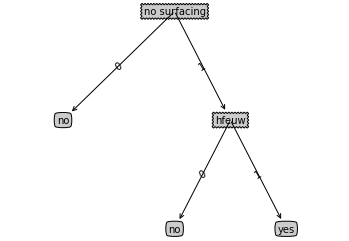

In [23]:
#测试用样例

def retrieveTree(i):
    listOfTrees = [{'no surfacing':{0:'no',1:{'hfeuw':{0:'no',1:'yes'}}}}]
    return listOfTrees[i]

testTree = retrieveTree(0)
print(testTree)
createPlot(testTree)

#截至到此绘图代码完成且没有问题

In [24]:
"""
函数说明:使用训练出的决策树模型对其他数据分类
​
Parameters:
    decisionTree - 决策树(字典)
    rowData - 数据的属性值
    names - 数据对应的标签属性
Returns:
    classLabel - 数据所属类别
"""
def dtClassify(decisionTree, rowData, names):
    names = list(names)                                        # 获取测试数据的特征列表
    feature = list(decisionTree.keys())[0]                     # 决策树对于该特征的值的判断字段，如纹理
    featDict = decisionTree[feature]                          # 获取特征的列
    feat = names.index(feature)                               # 获取该特征的索引值
    featVal = rowData[feat]                                   # 得到该特征的变量值
    if featVal in featDict.keys():
        if type(featDict[featVal]) == dict:
            classLabel = dtClassify(featDict[featVal], rowData, names)
        else:
            classLabel = featDict[featVal] 
    else:
        print("can't classify")
    return classLabel

['色泽', '根蒂', '敲声', '纹理', '脐部', '触感']
[['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 1], ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 1], ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 1], ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 1], ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 1], ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 1], ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', 1], ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', 1], ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', 0], ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', 0], ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', 0], ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', 0], ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', 0], ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', 0], ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0], ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑', 0], ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑', 0]]


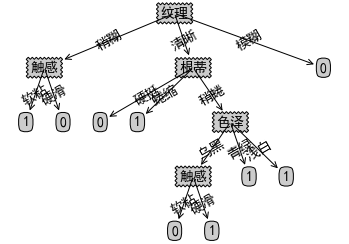

In [71]:
if __name__ == '__main__':
    my_data = pd.read_csv('lab/watermelon2.csv', encoding='gbk')   #读取数据csv文件
    data=my_data.values.tolist()
    label=my_data.columns.values.tolist()
    data = [tmp[1:] for tmp in data ] #二维list的切片，把编号除了
    labels=label[1:-1]
    print(labels)
    print(data)
    feature = feature(data,labels)
    myTree = createtree(data, labels, feature)
    # d1=pd.read_csv('./trainset.csv', encoding='gbk')
    # d2=pd.read_csv('./testset.csv', encoding='gbk')
    # traindataset=d1.values.tolist()
    # testdataset=d2.values.tolist()
    # myTree_prepruning = prepruningtree(traindataset,testdataset,labels,feature)
    # tree = createtree(traindataset,labels,feature)
    # myTree_postpruning = postpruning(tree,traindataset,testdataset,labels,feature)
    createPlot(myTree) 
    # createPlot(myTree_prepruning)
    # createPlot(myTree_postpruning)